## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

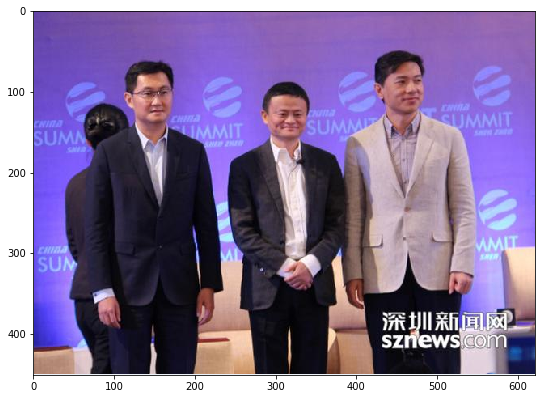

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/bat.png')
#image = cv2.imread('images/mona_lisa.jpg')
#image = cv2.imread('images/the_beatles.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


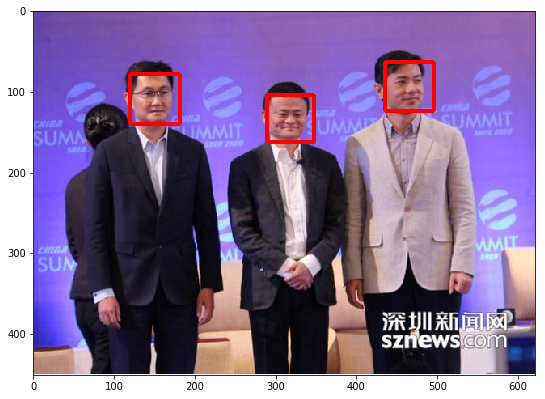

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 5)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_2.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=44944, out_features=3000, bias=True)
  (fc2): Linear(in_features=3000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




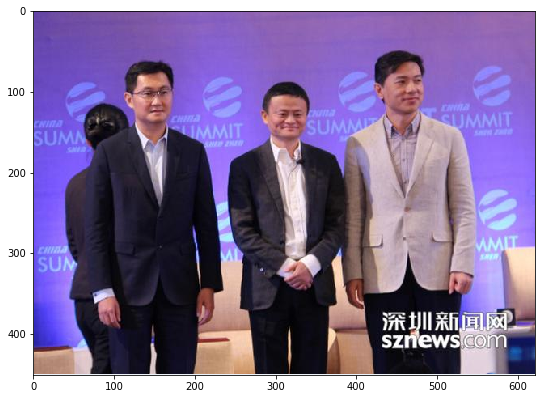

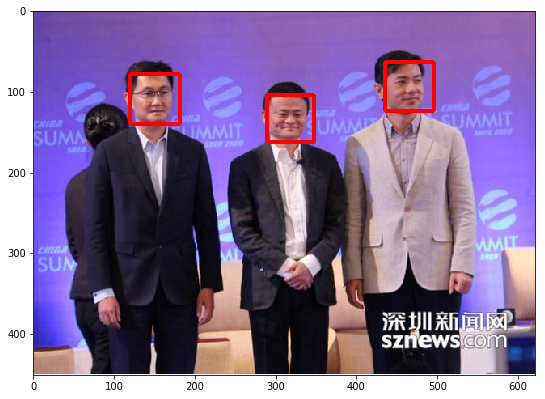

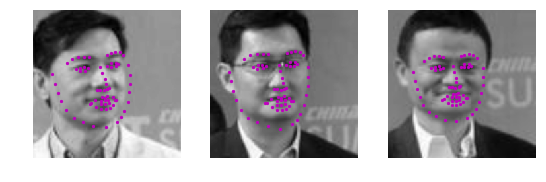

In [5]:
import torch

def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')

              
image_copy = np.copy(image)
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 5)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)


plt.figure(figsize=(9,9))
i = 0

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    ax = plt.subplot(1, len(faces), i+1)
    i = i + 1
    
    # padding
    y_padding = int(h*0.2)
    x_padding = int(w*0.2)
    # Select the region of interest that is the face in the image 
    roi = image_copy[int(y-y_padding):int(y+h+2*y_padding), int(x-x_padding):int(x+w+2*x_padding)]
    ## TODO: Convert the face region from RGB to grayscale
    roi_copy = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi_copy=  roi_copy/255.0
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    img = cv2.resize(roi_copy, (224, 224))
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    if(len(img.shape) == 2):
        img = img.reshape(img.shape[0], img.shape[1], 1)   
    img_t = img.transpose((2, 0, 1))
    img_tensor = torch.from_numpy(img_t)
    img_tensor = img_tensor.type(torch.FloatTensor)
    img_tensor = img_tensor.unsqueeze(0)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    output_pts = net(img_tensor)
    #print(output_pts.shape)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    #print(output_pts.shape)
    output_pts = output_pts.detach().numpy()[0]
    #print(output_pts.shape)
    # undo normalization of keypoints  
    output_pts = output_pts*50.0+100
    #print(output_pts)
    ## TODO: Display each detected face and the corresponding keypoints 
    show_all_keypoints(np.squeeze(img), output_pts)
    plt.axis('off')
    

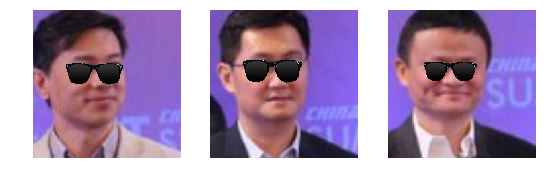

In [6]:
plt.figure(figsize=(9,9))
i = 0
# loop over the detected faces from your haar cascade and adding sunglasses or others
for (x,y,w,h) in faces:
    ax = plt.subplot(1, len(faces), i+1)
    i = i + 1
    
    y_padding = int(h*0.2)
    x_padding = int(w*0.2)
    # Select the region of interest that is the face in the image 
    roi = image_copy[int(y-y_padding):int(y+h+2*y_padding), int(x-x_padding):int(x+w+2*x_padding)]
    roi_f = cv2.resize(roi, (224, 224))
    ## TODO: Convert the face region from RGB to grayscale
    roi_copy = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi_copy=  roi_copy/255.0
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    img = cv2.resize(roi_copy, (224, 224))
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    if(len(img.shape) == 2):
        img = img.reshape(img.shape[0], img.shape[1], 1)   
    img_t = img.transpose((2, 0, 1))
    img_tensor = torch.from_numpy(img_t)
    img_tensor = img_tensor.type(torch.FloatTensor)
    img_tensor = img_tensor.unsqueeze(0)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    output_pts = net(img_tensor)
    #print(output_pts.shape)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    #print(output_pts.shape)
    output_pts = output_pts.detach().numpy()[0]
    #print(output_pts.shape)
    # undo normalization of keypoints  
    output_pts = output_pts*50.0+100
    #print(output_pts)
    #show_all_keypoints(np.squeeze(cv2.resize(roi, (224, 224))), output_pts)
    
    ## TODO: Display each detected face and adding sunglasses
    # top-left location for sunglasses to go
    # 17 = edge of left eyebrow
    key_pts = output_pts
    x_f = int(key_pts[17, 0])
    y_f = int(key_pts[17, 1])

    # height and width of sunglasses
    # h = length of nose
    h_f = int(abs(key_pts[27,1] - key_pts[34,1]))
    # w = left to right eyebrow edges
    w_f = int(abs(key_pts[17,0] - key_pts[26,0]))
    #print('{},{},{},{}'.format(x_f,y_f,h_f,w_f))

    # read in sunglasses
    sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
    # resize sunglasses
    new_sunglasses =  cv2.resize(sunglasses, (w_f, h_f), interpolation = cv2.INTER_CUBIC)
    
    # get region of interest on the face to change
    roi_color = roi_f[y_f:y_f+h_f,x_f:x_f+w_f]
    # find all non-transparent pts
    ind = np.argwhere(new_sunglasses[:,:,3] > 0)

    # for each non-transparent point, replace the original image pixel with that of the new_sunglasses
    for j in range(3):
        roi_color[ind[:,0],ind[:,1],j] = new_sunglasses[ind[:,0],ind[:,1],j]    
    # set the area of the image to the changed region with sunglasses
    roi_f[y_f:y_f+h_f,x_f:x_f+w_f] = roi_color
    plt.imshow(np.squeeze(roi_f), cmap='gray')
    plt.axis('off')